**1. Overall Total Expenditure Analysis**

District-wise Total Expenditure Summary:
             DISTRICT REGION_TYPE  Average Expenditure  Median Expenditure
0             Bankura       RURAL          7194.799784              6875.0
1          Barddhaman       RURAL          8996.163017              8252.0
2          Barddhaman       URBAN         13009.835458             11165.0
3             Birbhum       RURAL          8638.895485              8088.0
4    Dakshin Dinajpur       RURAL          9353.281250              8603.5
5           Darjiling       RURAL         10951.978763             10416.0
6               Haora       RURAL         11874.390573             11325.0
7               Haora       URBAN         15721.288402             14045.0
8               Hugli       RURAL         13265.996516             12426.0
9               Hugli       URBAN         14424.571931             13340.0
10         Jalpaiguri       RURAL         10350.284739              9619.0
11         Jalpaiguri       URBAN         12424.007843     

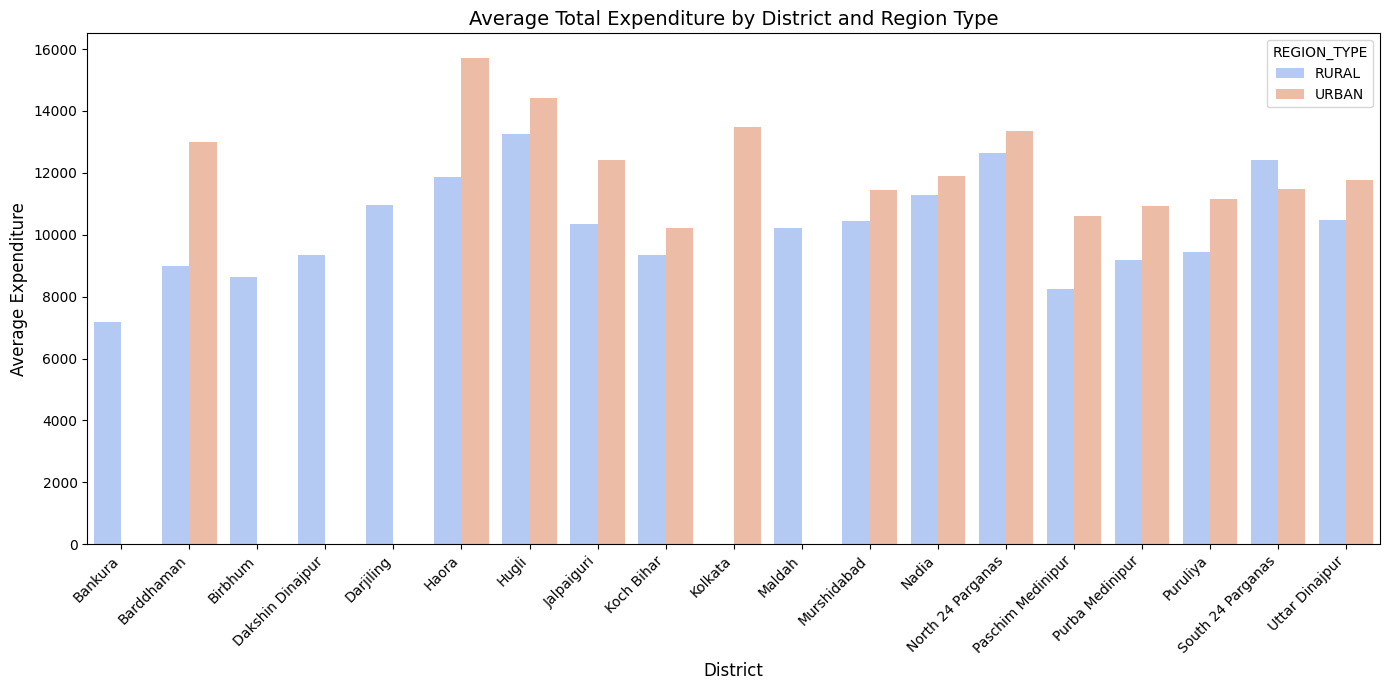

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "E:\MACRO Assignment\Consumption\Monthly Expenses\MasterFile.xlsx"
wb_data = pd.read_excel(file_path, engine='openpyxl')

# Group by district and region type, calculating mean and median
district_totals = wb_data.groupby(['DISTRICT', 'REGION_TYPE'])['TOT_EXP'].agg(['mean', 'median']).reset_index()

# Rename columns for clarity
district_totals.rename(columns={'mean': 'Average Expenditure', 'median': 'Median Expenditure'}, inplace=True)

# Display summary
print("District-wise Total Expenditure Summary:")
print(district_totals)

# Plot district-level average expenditure
plt.figure(figsize=(14, 7))
sns.barplot(data=district_totals, x='DISTRICT', y='Average Expenditure', hue='REGION_TYPE', palette='coolwarm')
plt.title('Average Total Expenditure by District and Region Type', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Average Expenditure', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**2. Category-Wise Expenditure Breakdown**

Category-Wise Expenditure Summary:
         Category  Total_Expenditure  Percentage
0      M_EXP_FOOD         2217455790   51.742160
1       M_EXP_EDU          182505507    4.258587
2    M_EXP_HEALTH          196225880    4.578739
3  Other_Expenses         1689400819   39.420514


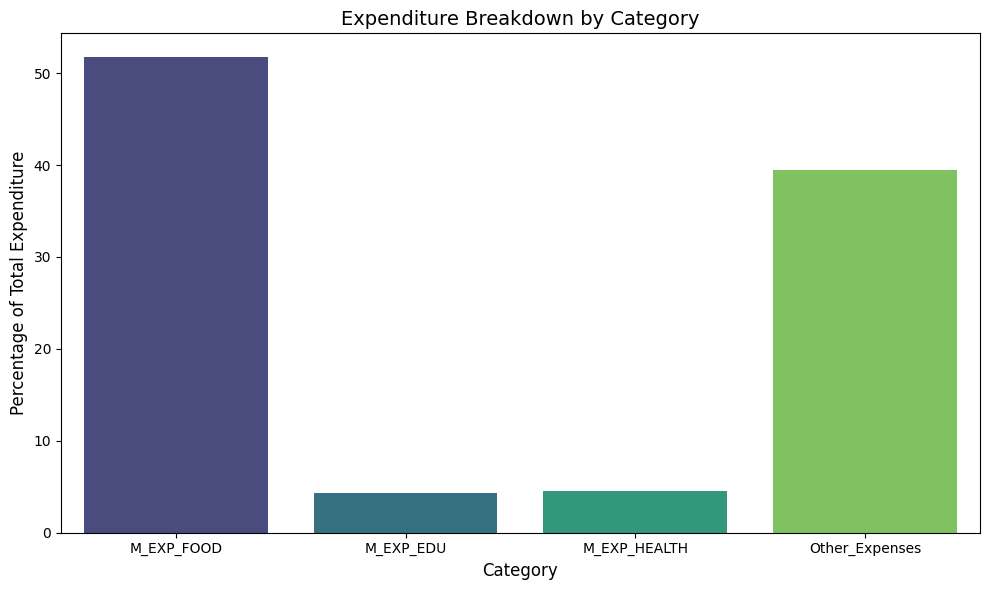

In [5]:
# Calculate category-wise expenditure as a percentage of total expenditure
category_columns = ['M_EXP_FOOD', 'M_EXP_EDU', 'M_EXP_HEALTH']
wb_data['Other_Expenses'] = wb_data['TOT_EXP'] - wb_data[category_columns].sum(axis=1)
categories = category_columns + ['Other_Expenses']

category_totals = wb_data[categories].sum().reset_index(name='Total_Expenditure')
category_totals.columns = ['Category', 'Total_Expenditure']
category_totals['Percentage'] = (category_totals['Total_Expenditure'] / wb_data['TOT_EXP'].sum()) * 100

# Display summary
print("Category-Wise Expenditure Summary:")
print(category_totals)

# Plot category-wise expenditure distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=category_totals, x='Category', y='Percentage', palette='viridis')
plt.title('Expenditure Breakdown by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage of Total Expenditure', fontsize=12)
plt.tight_layout()
plt.show()


**3. Urban vs Rural Analysis**

Urban vs Rural Category-Wise Expenditure Averages:
  REGION_TYPE   M_EXP_FOOD   M_EXP_EDU  M_EXP_HEALTH
0       RURAL  5754.296589  416.996395    464.638047
1       URBAN  6413.808541  556.542806    590.133084


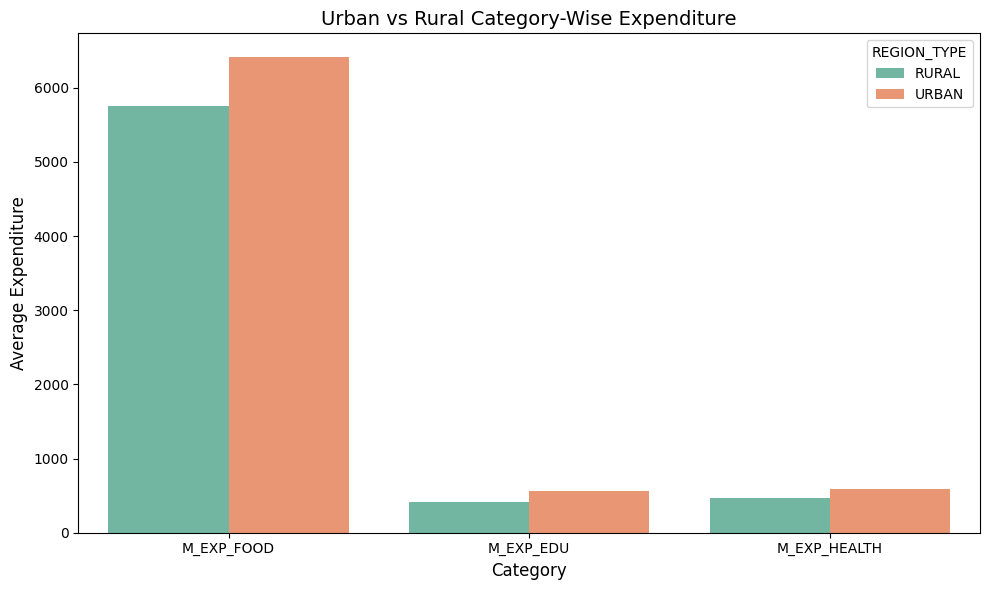

In [6]:
# Calculate urban vs rural category averages
urban_rural_exp = wb_data.groupby(['REGION_TYPE'])[['M_EXP_FOOD', 'M_EXP_EDU', 'M_EXP_HEALTH']].mean().reset_index()

# Melt data for visualization
urban_rural_melted = urban_rural_exp.melt(id_vars='REGION_TYPE', var_name='Category', value_name='Average Expenditure')

# Display summary
print("Urban vs Rural Category-Wise Expenditure Averages:")
print(urban_rural_exp)

# Plot urban vs rural category averages
plt.figure(figsize=(10, 6))
sns.barplot(data=urban_rural_melted, x='Category', y='Average Expenditure', hue='REGION_TYPE', palette='Set2')
plt.title('Urban vs Rural Category-Wise Expenditure', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Expenditure', fontsize=12)
plt.tight_layout()
plt.show()


**4. Income Group Trends**

Occupation Group-Wise Expenditure Averages:
                         OCCUPATION_GROUP       TOT_EXP   M_EXP_FOOD  \
0                  Agricultural Labourers   8239.705007  4926.964692   
1           Business & Salaried Employees  14845.025111  7366.338968   
2                           Entrepreneurs  18258.130292  8053.523995   
3                      Home-based Workers  10654.322617  5782.630462   
4                      Industrial Workers  12252.657088  6518.473467   
5    Legislators/Social Workers/Activists  11861.775510  5786.884354   
6                    Managers/Supervisors  21697.161165  8674.823301   
7                           Miscellaneous   8025.158249  4195.235274   
8      Non-industrial Technical Employees  11687.619213  6386.215107   
9                       Organised Farmers  12787.485124  6354.010086   
10  Qualified Self-employed Professionals  17921.594137  7612.701629   
11                           Retired/Aged  11967.937340  5662.603003   
12            Self-e

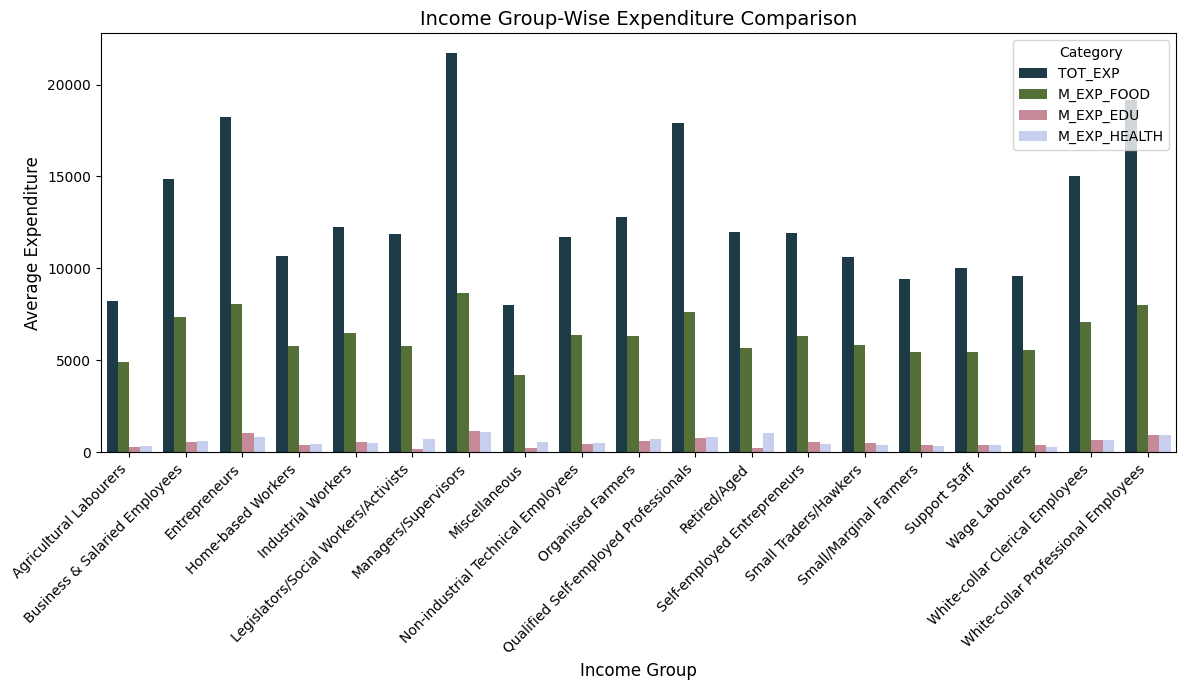

In [10]:
# Calculate income group averages
income_group_exp = wb_data.groupby(['OCCUPATION_GROUP'])[['TOT_EXP', 'M_EXP_FOOD', 'M_EXP_EDU', 'M_EXP_HEALTH']].mean().reset_index()

# Melt data for visualization
income_group_melted = income_group_exp.melt(id_vars='OCCUPATION_GROUP', var_name='Category', value_name='Average Expenditure')

# Display summary
print("Occupation Group-Wise Expenditure Averages:")
print(income_group_exp)

# Plot income group expenditure
plt.figure(figsize=(12, 7))
sns.barplot(data=income_group_melted, x='OCCUPATION_GROUP', y='Average Expenditure', hue='Category', palette='cubehelix')
plt.title('Income Group-Wise Expenditure Comparison', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Average Expenditure', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**5. District-Level Trends**

District and Region Total Expenditure Pivot Table:
REGION_TYPE               RURAL         URBAN
DISTRICT                                     
Bankura             7194.799784           NaN
Barddhaman          8996.163017  13009.835458
Birbhum             8638.895485           NaN
Dakshin Dinajpur    9353.281250           NaN
Darjiling          10951.978763           NaN
Haora              11874.390573  15721.288402
Hugli              13265.996516  14424.571931
Jalpaiguri         10350.284739  12424.007843
Koch Bihar          9331.184749  10226.433226
Kolkata                     NaN  13480.801772
Maldah             10210.026694           NaN
Murshidabad        10435.097495  11447.384016
Nadia              11287.762564  11891.984568
North 24 Parganas  12640.111298  13342.642651
Paschim Medinipur   8240.943589  10608.304112
Purba Medinipur     9185.955525  10933.344536
Puruliya            9431.726035  11165.633658
South 24 Parganas  12403.549090  11479.614627
Uttar Dinajpur     10481.4391

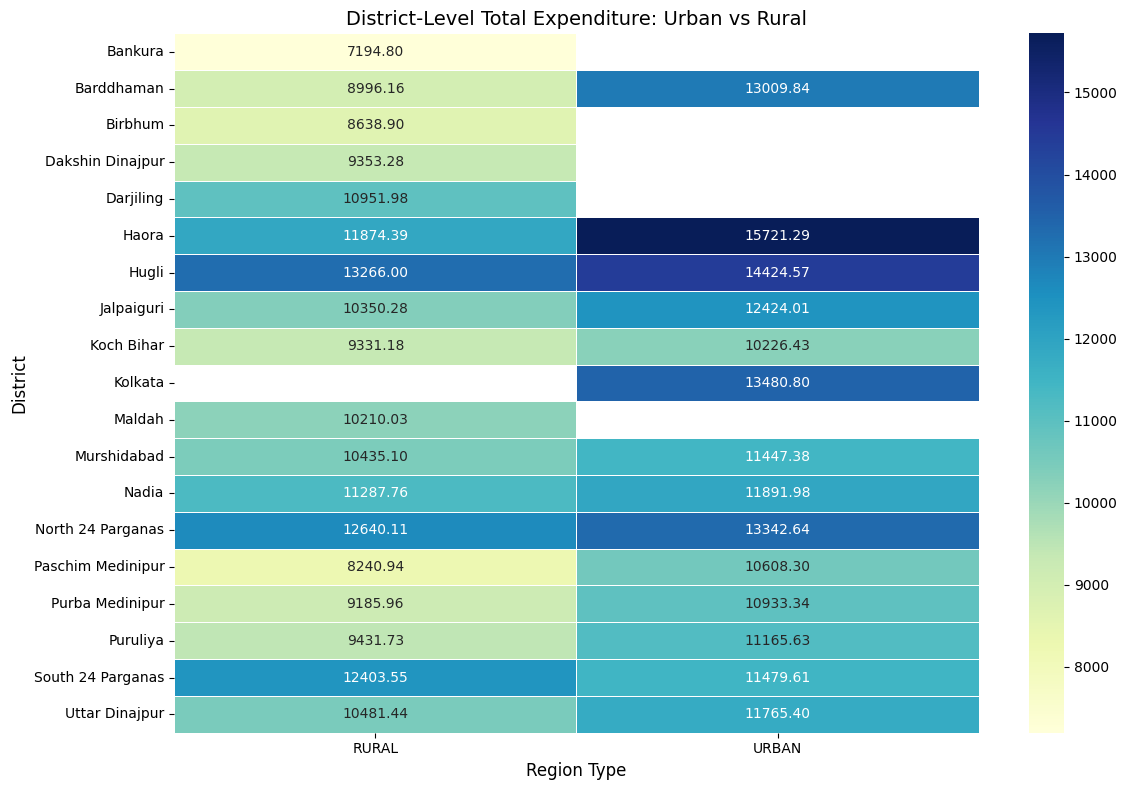

In [8]:
# District and region total expenditure pivot
district_region_pivot = wb_data.pivot_table(values='TOT_EXP', index='DISTRICT', columns='REGION_TYPE', aggfunc='mean')

# Display summary
print("District and Region Total Expenditure Pivot Table:")
print(district_region_pivot)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(district_region_pivot, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('District-Level Total Expenditure: Urban vs Rural', fontsize=14)
plt.xlabel('Region Type', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.tight_layout()
plt.show()


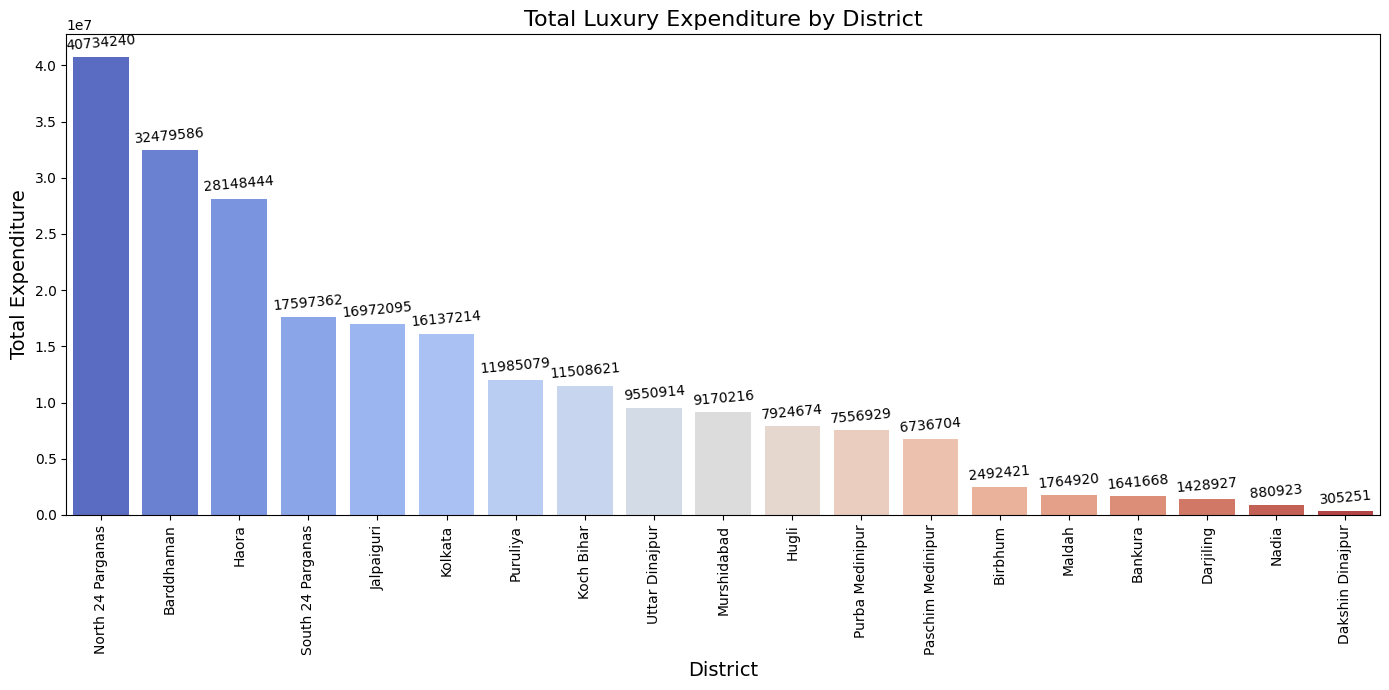

In [24]:

# Filter data for luxury goods expenditure columns
luxury_columns = [
    'M_EXP_CLOTHING_N_FOOTWEAR',
    'M_EXP_ARTIFICIAL_JEWELLERY',
    'M_EXP_GEMS_N_JEWELLERY',
    'M_EXP_COSMETICS'
]

# Group the data by DISTRICT and sum up all the luxury expenditure items for each district
district_luxury_data = wb_data.groupby(['DISTRICT'])[luxury_columns].sum().reset_index()

# Create a new column that aggregates the total expenditure on luxury items in each district
district_luxury_data['Total Luxury Expenditure'] = district_luxury_data[luxury_columns].sum(axis=1)

# Sort the districts by total luxury expenditure
district_luxury_data_sorted = district_luxury_data.sort_values(by='Total Luxury Expenditure', ascending=False)

# Plot the total luxury expenditure per district
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=district_luxury_data_sorted, x='DISTRICT', y='Total Luxury Expenditure', palette='coolwarm')

# Add values on top of each bar with adjusted positioning
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 3), textcoords='offset points', rotation=5)

# Adding titles and labels
plt.title('Total Luxury Expenditure by District', fontsize=16)
plt.xlabel('District', fontsize=14)
plt.ylabel('Total Expenditure', fontsize=14)
plt.xticks(rotation=90, ha='center')  # Rotate district labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
